In [1]:
import numpy as np
print("NumPy version:", np.__version__)
#This is just for practice purposes to get some handson

NumPy version: 2.3.2


In [29]:
import pandas as pd

def get_summary_stats(df: pd.DataFrame) -> pd.DataFrame:
    stats = df.describe().T      
    stats["missing"] = df.isna().sum()
    return stats


In [2]:
arr = np.arange(1, 11)  # 1..10
arr


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
np.sqrt(arr)  


array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974, 2.64575131, 2.82842712, 3.        , 3.16227766])

In [6]:
arr[arr % 2 == 0] 


array([ 2,  4,  6,  8, 10])

In [7]:
A = np.arange(1, 7).reshape(2, 3)  # 2 rows, 3 cols: [[1,2,3],[4,5,6]]
b = np.array([10, 20, 30])         A_plus_b = A + b                    


(array([[1, 2, 3],
        [4, 5, 6]]),
 array([10, 20, 30]),
 array([[11, 22, 33],
        [14, 25, 36]]))

In [8]:
import time

N = 1_000_000  
data = np.arange(N, dtype=np.int64)

# --- Python loop: sum of squares ---
t0 = time.perf_counter()
sum_loop = 0
for x in data:
    sum_loop += x * x
t1 = time.perf_counter()
loop_time = t1 - t0

# --- Vectorized NumPy: sum of squares ---
t0 = time.perf_counter()
sum_vec = np.sum(data * data)   # or: np.square(data).sum()
t1 = time.perf_counter()
vec_time = t1 - t0

print(f"sum_loop == sum_vec?  {sum_loop == int(sum_vec)}")
print(f"Loop time:       {loop_time:.4f} sec")
print(f"Vectorized time: {vec_time:.4f} sec")
print(f"Speedup ≈ {loop_time / vec_time:.1f}x")


sum_loop == sum_vec?  True
Loop time:       0.2753 sec
Vectorized time: 0.0029 sec
Speedup ≈ 94.3x


In [9]:
import numpy as np

arr = np.arange(1, 6)
print("Array:", arr)
print("Squared:", arr ** 2)

# Compare speed: loop vs vectorized
import time
N = 1_000_000
data = np.arange(N)

start = time.time()
squares_loop = [x**2 for x in data]
print("Loop time:", time.time() - start)

start = time.time()
squares_vec = data**2
print("Vectorized time:", time.time() - start)


Array: [1 2 3 4 5]
Squared: [ 1  4  9 16 25]
Loop time: 0.12666869163513184
Vectorized time: 0.0017361640930175781


In [10]:
df = pd.read_csv("../data/example_numbers.csv") 

NameError: name 'pd' is not defined

In [11]:
import pandas as pd



In [12]:
df = pd.read_csv("../data/example_numbers.csv")


FileNotFoundError: [Errno 2] No such file or directory: '../data/example_numbers.csv'

In [13]:
import os
print(os.getcwd())



C:\Users\User\bootcamp_Khushi_Khanna\homework\homework3\notebooks


In [14]:
import os
print(os.listdir())


['.ipynb_checkpoints', '01_fundamentals.ipynb', 'Untitled.ipynb']


In [15]:
import os
print(os.listdir(".."))


['.gitignore', 'data', 'notebooks', 'scripts', 'src']


In [16]:
print(os.listdir("../data"))


['example.csv']


In [17]:
import pandas as pd

df = pd.read_csv("../data/example.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
 2   c       3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [18]:
df.describe()


,a,b,c
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [22]:
import numpy as np

# fake category column
df["Category"] = np.where(df["a"] % 2 == 0, "Even", "Odd")
df


,a,b,c,Category
0,1,2,3,Odd
1,4,5,6,Even
2,7,8,9,Odd


In [23]:
df.groupby("Category").mean(numeric_only=True)


,a,b,c
Category,,,
Even,4.0,5.0,6.0
Odd,4.0,5.0,6.0


In [24]:
import os
os.makedirs("../data/processed", exist_ok=True)


In [26]:
summary = df.describe()
summary.to_csv("../data/processed/summary.csv")


In [27]:
summary.to_json("../data/processed/summary.json")


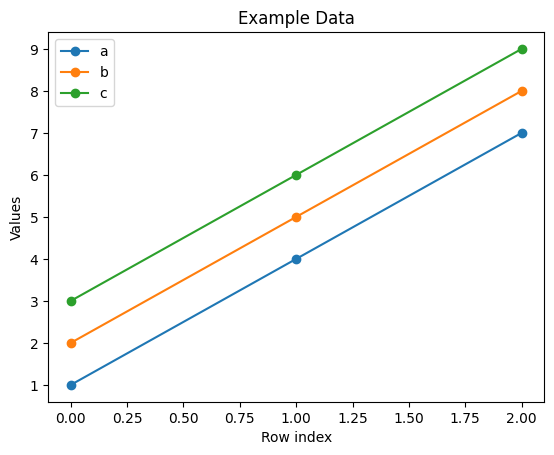

In [28]:
import matplotlib.pyplot as plt

df[["a","b","c"]].plot(kind="line", marker="o")
plt.title("Example Data")
plt.xlabel("Row index")
plt.ylabel("Values")
plt.savefig("../data/processed/example_plot.png")
plt.show()


In [30]:
get_summary_stats(df)


,count,mean,std,min,25%,50%,75%,max,missing
a,3.0,4.0,3.0,1.0,2.5,4.0,5.5,7.0,0
b,3.0,5.0,3.0,2.0,3.5,5.0,6.5,8.0,0
c,3.0,6.0,3.0,3.0,4.5,6.0,7.5,9.0,0


In [31]:
from __future__ import annotations
import pandas as pd

def get_summary_stats(df: pd.DataFrame) -> pd.DataFrame:
    stats = df.describe().T
    stats["missing"] = df.isna().sum()
    return stats



In [32]:
import sys
sys.path.append("..")  


In [33]:
from src.utils import get_summary_stats
get_summary_stats(df)


,count,mean,std,min,25%,50%,75%,max,missing
a,3.0,4.0,3.0,1.0,2.5,4.0,5.5,7.0,0
b,3.0,5.0,3.0,2.0,3.5,5.0,6.5,8.0,0
c,3.0,6.0,3.0,3.0,4.5,6.0,7.5,9.0,0
